# 8 steps of Machine Learning
1. Data gathering
2. data preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering/selection
5. Training model
6. Test model/Model evaluation
7. Hyper Parameter tuning
8. Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data gathering

In [ ]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

Check the basic info and missing values

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Return DataFrame with duplicate rows removed.
data.drop_duplicates(inplace=True)

In [ ]:
# count categorical unique value from make column
data['MAKE'].value_counts()
data.MAKE.value_counts()

In [ ]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

In [ ]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

In [ ]:
# count categorical unique value from TRANSMISSION  column
data['TRANSMISSION'].value_counts()

In [ ]:
data['FUELTYPE'].unique() # getting the name of unique value

In [ ]:
# count categorical unique value from FUELTYPE  column
data['FUELTYPE'].value_counts()

In [ ]:
data['MODELYEAR'].value_counts()

In [ ]:
# drop MODELYEAR COLUMN
data.drop(columns=['MODELYEAR'], inplace=True)

Statistical Analysis

In [ ]:
data.describe().T

# 2. Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
# each column transform categorical to numerical value and  update to dataframe
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col]) 

In [ ]:
data

# 3. EDA

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'])
plt.title('ENGINSIZE VS C02EMISSIONS')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data)
plt.title('ENGINESIZE VE CO2EMISSIONS')
plt.show()

In [ ]:
sns.distplot(data.ENGINESIZE,kde=False)
data['ENGINESIZE'].plot(kind='hist') # hist/bar
data.ENGINESIZE.plot(kind='hist') # by this plot we can know the distribution of data over x axis

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)

In [ ]:
sns.boxenplot(data=data, x='ENGINESIZE', )

# Feature Engineering

Finding important features

In [ ]:
correlation=data.corr()
correlation

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [ ]:
# Droping unnecessary ffeatures/column
data.drop(columns=['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION',
          'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG'], inplace=True)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [52]:
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


## Detect Quartile and remove

In [39]:
Q1=np.percentile(data.ENGINESIZE, 25, method='midpoint')
Q1

2.0

In [40]:
Q3=np.percentile(data.ENGINESIZE, 75, method='midpoint')
Q3

4.3

In [41]:
iQR=Q3-Q1
iQR

2.3

In [43]:
Q3+1.5*iQR

7.75

In [44]:
Q1-1.5*iQR

-1.4499999999999997

In [49]:
Outliers_index_upper=np.where(data['ENGINESIZE']>Q3+1.5*iQR)
Outliers_index_upper[0]

array([940, 941], dtype=int64)

In [51]:
Outliers_index_lower=np.where(data['ENGINESIZE']<Q1-1.5*iQR)
Outliers_index_lower[0]

array([], dtype=int64)

In [56]:
# Droping Outliers_index
data.drop(Outliers_index_upper[0], inplace=True)

In [57]:
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


In [ ]:
# All Quartile
Q1=np.percentile(data.ENGINESIZE, 25)
Q1
Q2=np.percentile(data.ENGINESIZE, 50)
Q2
Q3=np.percentile(data.ENGINESIZE, 75)
Q3
Q4=np.percentile(data.ENGINESIZE, 100)
Q4
Q0=np.percentile(data.ENGINESIZE,0)
Q0

In [ ]:
data.describe().T

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENGINESIZE'>

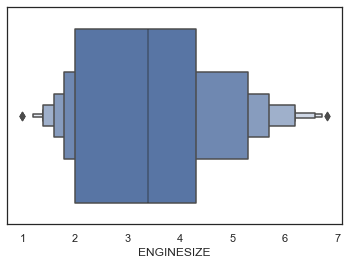

In [59]:
sns.boxenplot(data['ENGINESIZE'])